# Proyecto 1 security data science (Detección de primeros frudes en una tarjeta)

## Análisis exploratorio 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("feature_engineering_work\dataset_feature_engineering.csv")

In [3]:
# Vista general
print(df.shape)
print(df.columns)
print(df.head())

(1852394, 35)
Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
       'count_month_shopping_net', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534

In [4]:
# Tipos de datos y valores nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


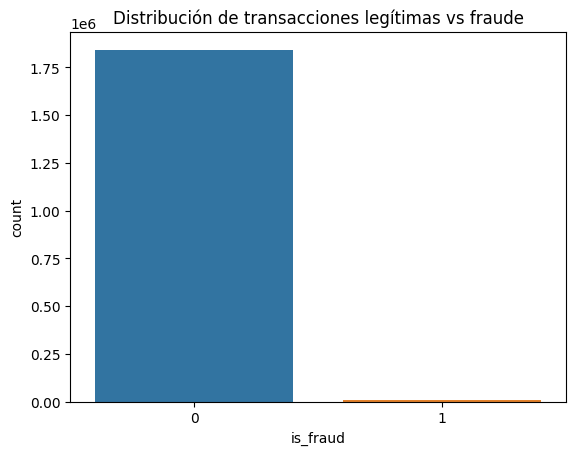

In [5]:
# Distribución de la variable objetivo
sns.countplot(data=df, x="is_fraud")
plt.title("Distribución de transacciones legítimas vs fraude")
plt.show()

In [6]:
# Porcentaje de fraudes
fraud_rate = df['is_fraud'].mean() * 100
print(f"Tasa de fraude: {fraud_rate:.2f}%")

Tasa de fraude: 0.52%


In [7]:
# Descripción estadística
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


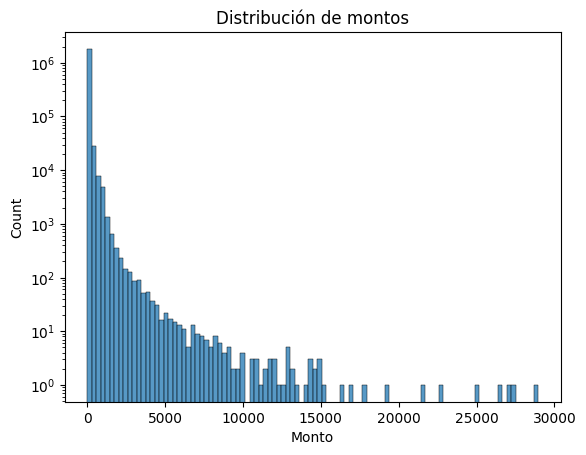

In [8]:
# Distribución de montos
sns.histplot(df['amt'], bins=100, log_scale=(False, True))
plt.title("Distribución de montos")
plt.xlabel("Monto")
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


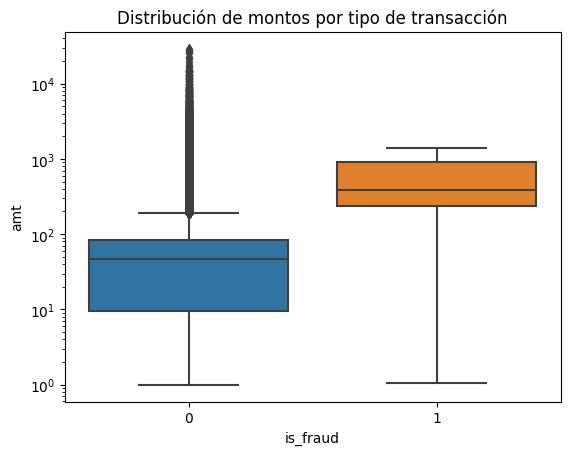

In [9]:
# Comparación de montos en fraudes vs legítimos
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.yscale('log')  # Montos muy variables
plt.title("Distribución de montos por tipo de transacción")
plt.show()

## EDA para tarjetas

In [10]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
df = df.sort_values(by=['cc_num', 'trans_date'])

In [11]:
tarjetas_con_fraude = df[df['is_fraud'] == 1]['cc_num'].nunique()
print(f"Tarjetas con al menos un fraude: {tarjetas_con_fraude}")


Tarjetas con al menos un fraude: 976


In [12]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
primer_fraude_por_tarjeta = df[df['is_fraud'] == 1].sort_values(['cc_num', 'trans_date']).groupby('cc_num').first().reset_index()

primer_fraude_por_tarjeta


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,trans_date
0,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,48.011851,3,4,1,2019,6,5,1,1,2012-03-01 01:32:53
1,60422928733,fraud_VonRueden Group,grocery_net,8.05,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,SC,...,108.095379,4,2,0,2019,1,1,1,1,2012-04-17 00:08:16
2,60423098130,fraud_Bradtke PLC,grocery_pos,317.39,Jason,Gray,M,875 Amy Point,Amorita,OK,...,59.833517,3,3,2,2019,3,3,1,1,2012-03-14 02:21:34
3,60427851591,fraud_Hudson-Ratke,grocery_pos,289.11,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,OK,...,86.105475,4,1,3,2019,1,1,1,1,2012-04-16 03:29:43
4,60487002085,"fraud_Moen, Reinger and Murphy",grocery_pos,337.39,David,White,M,66234 Hall Lock Suite 758,Jackson,MS,...,117.193549,9,1,1,2020,3,2,1,1,2013-09-22 01:11:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,4958589671582726883,fraud_Bailey-Morar,grocery_pos,285.80,Aaron,Pena,M,793 Hooper Tunnel Suite 154,Burke,VA,...,37.890299,10,5,2,2020,7,4,2,2,2013-10-17 02:48:40
972,4973530368125489546,fraud_Kuhic Inc,grocery_pos,301.54,Mary,Rodriguez,F,8986 Fitzgerald Plains,Winslow,AR,...,94.211672,8,4,0,2019,2,1,1,1,2012-08-30 00:13:53
973,4980323467523543940,fraud_Bednar Group,misc_net,690.55,Patrick,Massey,M,7812 Shane Shoals Apt. 607,North Haverhill,NH,...,69.060243,4,3,22,2020,1,1,1,1,2013-04-16 22:08:26
974,4989847570577635369,fraud_Kiehn Inc,grocery_pos,352.15,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,SC,...,63.352320,7,5,3,2020,4,2,1,1,2013-07-04 03:17:41


In [13]:
primera_transaccion = df.groupby('cc_num')['trans_date'].min().reset_index()
primer_fraude_merged = pd.merge(primer_fraude_por_tarjeta[['cc_num', 'trans_date']], primera_transaccion, on='cc_num', suffixes=('_fraude', '_inicio'))
primer_fraude_merged['dias_hasta_fraude'] = (primer_fraude_merged['trans_date_fraude'] - primer_fraude_merged['trans_date_inicio']).dt.days



c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


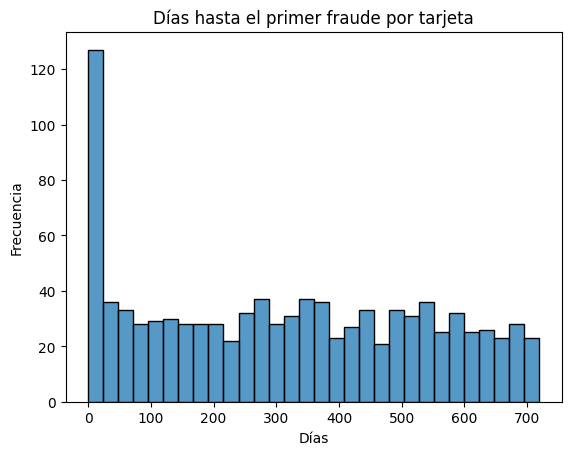

In [15]:
sns.histplot(primer_fraude_merged['dias_hasta_fraude'], bins=30)
plt.title("Días hasta el primer fraude por tarjeta")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.show()

In [18]:
primer_fraude_merged


,cc_num,trans_date_fraude,trans_date_inicio,dias_hasta_fraude
0,60416207185,2012-03-01 01:32:53,2012-01-01 12:47:15,59
1,60422928733,2012-04-17 00:08:16,2012-01-03 18:38:26,104
2,60423098130,2012-03-14 02:21:34,2012-01-01 06:48:36,72
3,60427851591,2012-04-16 03:29:43,2012-01-01 07:36:27,105
4,60487002085,2013-09-22 01:11:51,2012-01-06 03:23:55,624
...,...,...,...,...
971,4958589671582726883,2013-10-17 02:48:40,2012-01-01 01:38:31,655
972,4973530368125489546,2012-08-30 00:13:53,2012-01-03 12:31:03,239
973,4980323467523543940,2013-04-16 22:08:26,2012-01-02 07:45:21,470
974,4989847570577635369,2013-07-04 03:17:41,2012-01-02 13:15:20,548


In [ ]:
primer_fraude_por_tarjeta['first_time_at_merchant'].value_counts(normalize=True)


first_time_at_merchant
False    0.550205
True     0.449795
Name: proportion, dtype: float64

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


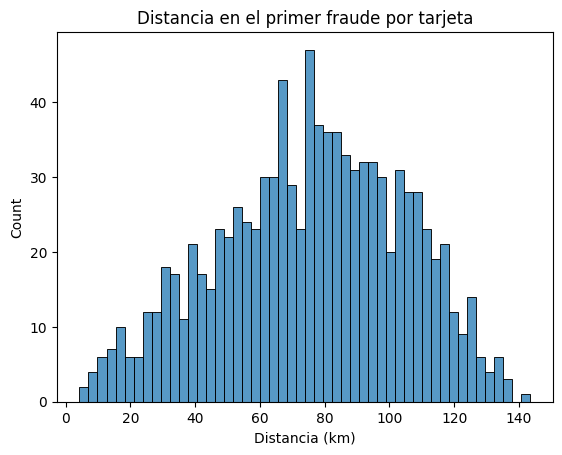

In [ ]:

sns.histplot(primer_fraude_por_tarjeta['dist_between_client_and_merch'], bins=50)
plt.title("Distancia en el primer fraude por tarjeta")
plt.xlabel("Distancia (km)")
plt.show()


In [ ]:
n_tarjetas_unicas = df['cc_num'].nunique()
print(f"Cantidad de tarjetas únicas: {n_tarjetas_unicas}")


Cantidad de tarjetas únicas: 999


In [19]:
#categorias que aparecen mas en primeros fraudes 
primeros_fraudes = df[df['is_fraud'] == 1].sort_values(by='unix_time').drop_duplicates(subset='cc_num', keep='first')

# Ver las categorías más comunes en esos primeros fraudes
categoria_fraudes = primeros_fraudes['category'].value_counts(normalize=True) * 100
print(categoria_fraudes)

category
grocery_pos       43.340164
gas_transport     17.520492
shopping_net      10.450820
misc_net           8.811475
shopping_pos       6.762295
grocery_net        4.098361
misc_pos           3.073770
entertainment      1.434426
food_dining        1.434426
personal_care      0.819672
kids_pets          0.717213
travel             0.614754
health_fitness     0.512295
home               0.409836
Name: proportion, dtype: float64


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

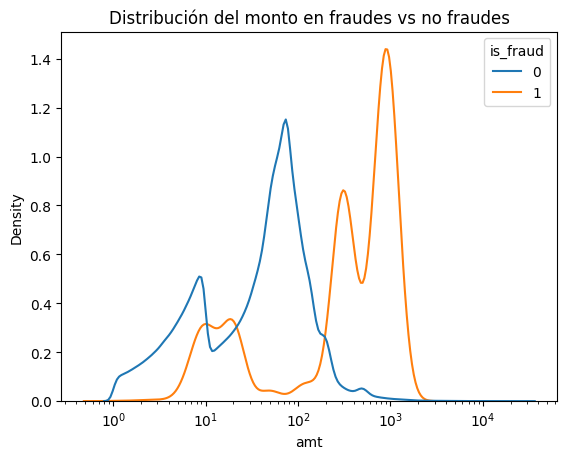

In [20]:
sns.kdeplot(data=df, x='amt', hue='is_fraud', common_norm=False, log_scale=True)
plt.title("Distribución del monto en fraudes vs no fraudes")
plt.show()

## Ingeniería de variables 

In [22]:
#columna de fecha está en datetime
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')

In [23]:
# ========================
# 1. Variable: Transacción fuera del horario habitual
# ========================
df['transaccion_noche'] = df['hour'].apply(lambda x: 1 if (x < 6 or x > 22) else 0)

In [24]:
# ========================
# 2. Variable: Transacción de alto monto (percentil 95)
# ========================
umbral_alto_monto = df['amt'].quantile(0.95)
df['alto_monto'] = df['amt'].apply(lambda x: 1 if x > umbral_alto_monto else 0)

In [25]:
# ========================
# 3. Variable: Gasto mensual relativo al anual
# ========================
df['relacion_gasto_mes_anual'] = df['amt_month'] / (df['amt_year'] + 1e-5)

In [26]:
# ========================
# 4. Variable: Diferencia geográfica
# ========================
def clasificar_distancia(dist):
    if dist < 30:
        return 'corta'
    elif 30 <= dist <= 60:
        return 'media_baja'
    elif 60 < dist <= 100:
        return 'media_alta'  # zona común en fraudes iniciales
    else:
        return 'larga'
    
df['rango_distancia'] = df['dist_between_client_and_merch'].apply(clasificar_distancia)

In [27]:
# ========================
# 5. Variable: distancia sospechosa entre cliente y comercio
# (entre 60 y 100 km)
# ========================
df['distancia_sospechosa'] = df['dist_between_client_and_merch'].between(60, 100)

In [28]:
# ========================
# 6. Variable: Monto de la transacción log-transformado
# ========================
df['log_amt'] = np.log1p(df['amt'])

In [29]:
# ========================
# 7. Variable: días hasta el primer fraude por tarjeta
# ========================
# Obtener la primera transacción fraudulenta por tarjeta
primer_fraude_por_tarjeta = (
    df[df['is_fraud'] == 1]
    .sort_values(['cc_num', 'trans_date'])
    .groupby('cc_num')
    .first()
    .reset_index()
)

# Obtener la primera transacción en general por tarjeta
primera_transaccion = (
    df.groupby('cc_num')['trans_date']
    .min()
    .reset_index()
    .rename(columns={'trans_date': 'trans_date_inicio'})
)

# Merge para calcular días hasta fraude
primer_fraude_merged = pd.merge(
    primer_fraude_por_tarjeta[['cc_num', 'trans_date']],
    primera_transaccion,
    on='cc_num',
    how='inner'
)
primer_fraude_merged.rename(columns={'trans_date': 'trans_date_fraude'}, inplace=True)
primer_fraude_merged['dias_hasta_fraude'] = (
    primer_fraude_merged['trans_date_fraude'] - primer_fraude_merged['trans_date_inicio']
).dt.days

# Agregar al df principal
df = df.merge(
    primer_fraude_merged[['cc_num', 'dias_hasta_fraude']],
    on='cc_num',
    how='left'
)

In [36]:
columnas_utiles = [
    'is_fraud',
    'transaccion_noche',
    'alto_monto',
    'relacion_gasto_mes_anual',
    'rango_distancia',
    'distancia_sospechosa',
    'first_time_at_merchant',
    'category',
    'log_amt',
    'dias_hasta_fraude',
    'trans_date'
]

df_modelo = df[columnas_utiles].copy()

In [37]:
df_modelo

,is_fraud,transaccion_noche,alto_monto,relacion_gasto_mes_anual,rango_distancia,distancia_sospechosa,first_time_at_merchant,category,log_amt,dias_hasta_fraude,trans_date
0,0,0,0,0.999999,larga,False,True,misc_net,2.112635,59.0,2012-01-01 12:47:15
1,0,0,0,1.000000,larga,False,True,gas_transport,3.987872,59.0,2012-01-02 08:44:57
2,0,0,0,1.000000,corta,False,True,gas_transport,4.419804,59.0,2012-01-02 08:47:36
3,0,0,0,1.000000,media_alta,True,True,kids_pets,3.577669,59.0,2012-01-02 12:38:14
4,0,0,0,1.000000,media_alta,True,True,home,3.338613,59.0,2012-01-02 13:10:46
...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,0.147864,media_baja,False,False,gas_transport,4.206333,304.0,2013-12-31 02:10:10
1852390,0,1,0,0.147907,media_alta,True,False,misc_net,1.719189,304.0,2013-12-31 05:13:35
1852391,0,0,0,0.148792,media_baja,False,False,gas_transport,4.574299,304.0,2013-12-31 11:15:44
1852392,0,0,0,0.150168,media_alta,True,False,grocery_pos,5.013830,304.0,2013-12-31 11:17:25


### One-Hot encoding para variables categóricas

In [38]:
# Definir las top 5 categorías con mayor proporción de fraude
top5_categorias = ['grocery_pos', 'gas_transport', 'shopping_net', 'misc_net', 'shopping_pos']

# Crear nueva columna donde las demás categorías se agrupan como "otras"
df_modelo['categoria_reducida'] = df['category'].apply(lambda x: x if x in top5_categorias else 'otras')




In [39]:
# Convertir booleanas a enteros (0 y 1)
booleanas = ['first_time_at_merchant', 'distancia_sospechosa']
df_modelo[booleanas] = df_modelo[booleanas].astype(int)

In [40]:
# Aplicar One-Hot Encoding a variables categóricas
df_modelo = pd.get_dummies(df_modelo, columns=['categoria_reducida','rango_distancia'], drop_first=True)

In [43]:
# Solo seleccionamos columnas booleanas o de tipo 'uint8' (dummies)
cols_to_convert = df_modelo.select_dtypes(include=['bool', 'uint8']).columns
df_modelo[cols_to_convert] = df_modelo[cols_to_convert].astype(int)


In [45]:
df_modelo.drop(columns=['category'], inplace=True)

In [46]:
df_modelo

,is_fraud,transaccion_noche,alto_monto,relacion_gasto_mes_anual,distancia_sospechosa,first_time_at_merchant,log_amt,dias_hasta_fraude,trans_date,categoria_reducida_grocery_pos,categoria_reducida_misc_net,categoria_reducida_otras,categoria_reducida_shopping_net,categoria_reducida_shopping_pos,rango_distancia_larga,rango_distancia_media_alta,rango_distancia_media_baja
0,0,0,0,0.999999,0,1,2.112635,59.0,2012-01-01 12:47:15,0,1,0,0,0,1,0,0
1,0,0,0,1.000000,0,1,3.987872,59.0,2012-01-02 08:44:57,0,0,0,0,0,1,0,0
2,0,0,0,1.000000,0,1,4.419804,59.0,2012-01-02 08:47:36,0,0,0,0,0,0,0,0
3,0,0,0,1.000000,1,1,3.577669,59.0,2012-01-02 12:38:14,0,0,1,0,0,0,1,0
4,0,0,0,1.000000,1,1,3.338613,59.0,2012-01-02 13:10:46,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,0.147864,0,0,4.206333,304.0,2013-12-31 02:10:10,0,0,0,0,0,0,0,1
1852390,0,1,0,0.147907,1,0,1.719189,304.0,2013-12-31 05:13:35,0,1,0,0,0,0,1,0
1852391,0,0,0,0.148792,0,0,4.574299,304.0,2013-12-31 11:15:44,0,0,0,0,0,0,0,1
1852392,0,0,0,0.150168,1,0,5.013830,304.0,2013-12-31 11:17:25,1,0,0,0,0,0,1,0
